In [1]:
pip install pillow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from IPython.display import Image

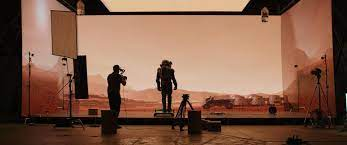

In [3]:
Image('Img/download (2).jpg', width=1000, height=500)

# Microsoft Movie Studio Analysis





**Author:** **Sneha Bhaskar**

**Date:** 12 August 2023


************

 # <font color='red' > Overview </font>

In response to the growing trend of big companies investing in movie studios. Microsoft has decided to enter the entertainment arena by establishing a new movie studio. However, lacking experience in the film industry, Microsoft company wants to seek valuable insights before embarking on its cinematic journey. As part of this exploratory phase, I have been given a task to analyze the current state of the box office and identify the most successful film genres. This research aims to provide actionable insights to assist the head of Microsoft's new movie studio in making informed decisions regarding the types of films to create.

I will analyze the data provided to identify what attributes the top-performing films have in common using my data analysis, statistics, and visualizations. Through my analysis, I have been able to identify the top genres, average runtime for a movie, and correlation between domestic gross with variables like runtime, genres, and production budget. Based on these findings, I have made recommendations to consider top genres while also exploring why other genres are not making success in terms of revenue, to stick with average runtime, and aim for the highest production budget to yield high returns because quality matters the most when it comes to success.


 # <font color='red' > Business Problem </font>

As big companies like Universal Pictures, Paramount, Warner Bros, and Disney are investing in original video content and Microsoft company is looking to join this trend by creating its very own "MOVIE STUDIO". But they are currently facing the challenge of navigating an unfamiliar industry. With no prior experience in creating movies, Microsoft seeks insights into the most successful film genres currently dominating the box office.
******************************************************

As part of this exploration, my role is to analyze box office trends and translate these findings into actionable strategies that the head of Microsoft's movie studio can use to make informed decisions on the types of films they want to produce.

Questions to consider:

- What is the top-ranking movie genre?
- What should be the average length of the movie?
- Correlation between domestic gross profit and other variables like runtime, genres, and production budget?

By finding answers to these questions, I believe I can provide valuable insight to Microsoft to identify the gaps they have been looking to produce a successful launch of their movie studio

 # <font color='red' > Data Understanding </font>

For this analysis, I utilized datasets from BoxOffice Mojo, IMDB, and The Numbers to get accurate actionable insights to the head of Microsoft's new movie studio. 

***************************************************************************

<font color='Green' >Background information on datasets; </font>

**IMDB** is the Internet Movie Database that provides a wealth of information about movies, television shows, video games, and all aspects of the entertainment industry. However, for this analysis, I used IMDB for gathering information on movies only as this is the main aspect of this project. The most primary categories of information you can find on the IMDB website for most films are;
- Title and Year
- Top 250 Movies
- Most popular movies
- Genres
- Runtime
- Number of votes
- Top Box office

The IMDB datasets used in this project were categorized into two data's 

1. Title Basics Dataset - Had 146,144 items focusing on titles, genres, runtime, year. These datasets contained duplicates of titles and missing values for runtime, which were discussed in the data preparation section. 
2. Title Rating Dataset - Had 73,856 items focusing on average ratings and number of votes. This dataset had no duplicates or missing values.

**Box Office Mojo** is an online movie publication and box office reporting service. Its primary function is to track box office revenue in a systematic, algorithmic way. The most common information we can find about movies from this website is;
- Domestic gross
- Foreign gross
- Top 10 domestic/foreign gross
- Distributer or studios
- Box office showdowns

The dataset used for this had 3387 items. For this dataset my main focus was domestic gross for analysis, the data type for this was in float which was converted to integer for better understanding.  

**The Number** is another online platform that provides the financial analysis for each movie in terms of;
- Investor scenarios
- Domestic and international analysis
- Production Budget
- Comparison between different films' financial status

The dataset used for this had 5782 items focusing on the title, release date, production budget, domestic gross, and worldwide gross. My main interest was the production budget and domestic gross, which had a '$' string value in front of the number that was covered to float and then to integer (the full method is explained in data preparation). 

****************************************************
Using pieces of information from these datasets, I was able to answer my questions proposed in business problems based on the target variables (Genres, Runtime, Domestic Gross, Production Budget)


## Importing packages and datasets

In [4]:
#import standard packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
#Here you run your code to explore the datas
#In this project i decided to use datasets from Internet Movie Database (IMDB), Box office Mojo and The numbers(TN).

In [6]:
#Read the datasets by importing datas into DataFrames using Panda 
#df1 = Box Office Mojo 
#df2 = IMDB (title basic )
#df3 = IMDP (title ratings) 
#df4 = TN (The Number)

In [7]:
#Looking at the top five (.head()) and bottom five (.tail()) rows of each datasets for a better understanding 
#df1 
#df2
#df3
#df4

**DATAFRAME 1**

In [8]:
#Using pandas library we can import files such as CSV into a DataFrame
#CSV format is a common data storage format in which each line represents a row of data and fields are separated by commas.
df1= pd.read_csv("zippedData/bom.movie_gross.csv")

In [9]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
df1.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [11]:
#using .info() to get quick overviw of the data structure which will give information;
#on the number of entries and coloumn
#the type of each column
#the number of non-null values in each column
#memory usuage of the dataframe. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


**DATAFRAME 2**

In [12]:
df2= pd.read_csv('zippedData/title.basics.csv')

In [13]:
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
df2.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


**DATAFRAME 3**

In [16]:
df3= pd.read_csv('zippedData/title.ratings.csv')
df3

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
#Using sort_value() code below will rearrange the df3 DataFrame based on the values in the column 'numvotes', with the highest values at the top and the lowest values at the bottom. 
#ascending = False parameter sorts the dataframe in descending order based on the values in the specified coloumn. If omit true that dataframe will be sorted in ascending order
df3.sort_values(['numvotes'], ascending=False)

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


In [18]:
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
df3.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


**DATAFRAME 4**

In [21]:
df4= pd.read_csv('zippedData/tn.movie_budgets.csv')
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [22]:
df4.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [23]:
df4.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
#find out what type of data is df1,df2,df3,df4

In [26]:
type(df1)
type(df2)
type(df3)
type(df4)

pandas.core.frame.DataFrame

 # <font color='red' > Data Preparation </font>

After importing and reviewing the datasets, I found that there were missing values, duplicates, incorrect data types, and outliers for many variables that were interesting for this project. 
 
 *********************************************************************

- For the df1 Dataset, I first converted domestic_gross datatype from float to integer. The reason why I chose to correct the datatype for the targeted variable was that floating numbers can suffer precision issues like rounding errors. By representing money as an integer it can avoid this imprecision, therefore it's easier to perform any arithmetic functions. 
- For the df2 Dataset, I found duplicated titles in the form of primary_title and original_title. By removing the duplicates we can avoid skewing the data analysis and giving misleading results. I also found there were missing values for runtime_minutes, which were replaced with zero (0), replacing them with zero instead of dropping or deleting them can save us from losing other valuable information from that row for example genres. 
- For the df3 Dataset, there were no missing values or duplicates were detected. 
- For the df4 Dataset, I again converted production_budget, domestic_gross and worldwide_gross from string to float to integer. For this data cleaning, I used the Stackerflow platform to figure out how to remove the string element "dollar sign". This mission was achieved first by using the 'locale' module in Python to convert string representations of numbers into actual float numbers. The 'locale.atof()' function is used to convert string with locale-aware formatting (e.g. currency symbols) into a float which was then easy to convert into integers. 

After cleaning the datasets, I merged df1,df2, and df3 datasets together to answer what are the top-ranking movie genres, what should be the average runtime for a movie and whether is there any correlation between domestic gross, runtime, and genres. 

For this I limited the number of values in this merged dataset to 2000 in order to collect a meaningful value of reviewed films and expanded the genres column into subsets of genres to get a better understanding of top-ranking genres Microsoft company should focus on to get a blockbuster movie and increase in profit. Also did last-minute data cleaning for the final merged dataset, where I detected duplicate columns for a year. 

I did further narrow this scope as my analysis progressed to the top 1500 films ranked by number of votes to figure out; 
- Top Ranking genres
- Average runtime in minutes 
- Correlation between domestic gross and variables like genres, runtime, and production budget. 

The correlation between the production budget and domestic gross was purely done using the df4 dataset. 


## Data Cleaning

Data cleaning is the process of detecting, correcting or removing any inaccuaries in data to improve its quality. 

In [27]:
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [69]:
#handle potentials NaNs in 'domestic_gross' column by dropping them
df1 = df1.copy() 
df1 = df1.dropna(subset=['domestic_gross']) #this drop rows where "domestic_gross" is NaN

#changing the data type for 'domestic_gross' from float to integer. As this will give us a better view
df1.loc[:,'domestic_gross']= df1['domestic_gross'].astype(int)
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [29]:
#checking how many rows and the datatype for domestic_gross
#items or entries = 3359, which means the rows which had NaN were deleted of this dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3359 non-null   object
 1   studio          3356 non-null   object
 2   domestic_gross  3359 non-null   int32 
 3   foreign_gross   2009 non-null   object
 4   year            3359 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 144.3+ KB


In [30]:
df2

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [31]:
#df2 dataset
#In this dataframe the title is duplicated in the form of 'primary_title' and 'original_title', which is confusing to read the data.
#Therefore it's better to have one column focusing on 'orignial_title' for simplicity.
#using .drop() function to delete 'primary_title'

In [32]:
df2 = df2.drop('primary_title', axis=1)
df2.head()

,tconst,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
#Renaming column 'original_title' to 'title' on df2 DataFrame 

In [34]:
#renaming 'original_title' to 'title', as this will make it easier to merge data to df1 [zippedData/bom.movie_gross.csv]. 
df2.rename(columns={'original_title':'title'}, inplace=True)

In [35]:
df2

,tconst,title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [36]:
#filling up NaN with 0 in 'runtime_minutes' using fillna() to give us a better understanding 
df2['runtime_minutes'].fillna(0, inplace=True)

df2

,tconst,title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,0.0,Documentary
146141,tt9916706,Dankyavar Danka,2013,0.0,Comedy
146142,tt9916730,6 Gunn,2017,116.0,NaN


In [37]:
df3

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [38]:
#no missing values were detected in df3 
df3.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [39]:
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [40]:
#used stackerflow to solve how to convert string (currency symbol) to float for domestic_gross column using Locale
#Using 'locale' module in python to convert string representations of numbers into actual float numbers.
#The 'locale.atof()' function is used to convert string with locale-aware formatting (eg currency symbols) into a float 

import locale

locale.setlocale(locale.LC_ALL,'')
df4['domestic_gross']=df4.domestic_gross.map(lambda x: locale.atof(x.strip('$')))
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382.0,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0.0,$0
5778,79,"Apr 2, 1999",Following,"$6,000",48482.0,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338.0,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0.0,$0


In [41]:
#to change string type to float for production_budget 
locale.setlocale(locale.LC_ALL,'')
df4['production_budget']=df4.production_budget.map(lambda x: locale.atof(x.strip('$')))
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,$0
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,$0


In [42]:
#to change string type to float for worldwide_gross 
locale.setlocale(locale.LC_ALL,'')
df4['worldwide_gross']=df4.worldwide_gross.map(lambda x: locale.atof(x.strip('$')))
df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [70]:
#converting float to int
# First, round the values in the specified columns
rounded_values = df4[['domestic_gross', 'production_budget', 'worldwide_gross']].round().fillna(0) 
#float values will be rounded to the nearest whole number before they ae converted to integers. 

# Convert the rounded values to integers
int_values = rounded_values.astype(int)

# Assign the integer values back to the columns in df4
df4[['domestic_gross', 'production_budget', 'worldwide_gross']] = int_values


df4

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


## Merging DataFrames

Merging datasets in a common operation in data manipulation and analysis. Using the panda library its provides a powerful funtionality to merge, join and concatenate datasets. 

**Merge 1**

In [44]:
#Merging df2 (title_basics) and df3 (title_ratings) to get better dataframe to find out solution for;
#What are the top ranking movie genre?
#How long should the film run in minutes for movie genres?

In [45]:
#merging df2 and df3 DataFrame on a common column 'tconst' and using left join of df2 
merged_imdb_df= pd.merge(df2, df3, on='tconst', how='left')
merged_imdb_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13.0
4,tt0100275,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,0.0,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,2013,0.0,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,2017,116.0,NaN,NaN,NaN


In [46]:
#by merging df2 and df3 by using the left join function, it undisturbs the item numbers
merged_imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   title            146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  146144 non-null  float64
 4   genres           140736 non-null  object 
 5   averagerating    73856 non-null   float64
 6   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.9+ MB


**Merge 2**

In [47]:
#merging merged_imdb_df to df1 (bom.movie_gross) at common column 'title' to get better dataframe to find out solution for;
#does domestic_gross correlates with genres, runtime or any other variables?

In [48]:
#creating final_df DataFrame by merging merged_imdb_df to df1 at common column 'title' to answer the questions proposed for this project. 
final_df= pd.merge(merged_imdb_df, df1, on='title') #merging at inner to keep it simple and low items number
final_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0,Relbig.,1100000,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886.0,IFC,744000,8000000,2012
2,tt2404548,On the Road,2011,90.0,Drama,NaN,NaN,IFC,744000,8000000,2012
3,tt3872966,On the Road,2013,87.0,Documentary,NaN,NaN,IFC,744000,8000000,2012
4,tt4339118,On the Road,2014,89.0,Drama,6.0,6.0,IFC,744000,8000000,2012
...,...,...,...,...,...,...,...,...,...,...,...
2751,tt8549902,Oolong Courtyard,2018,103.0,Comedy,4.6,61.0,CL,37700,NaN,2018
2752,tt8802728,The Witch,2018,0.0,Horror,NaN,NaN,A24,25100000,15300000,2016
2753,tt8851262,Spring Fever,2019,0.0,"Comedy,Horror",NaN,NaN,Strand,10800,150000,2010
2754,tt9151704,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067.0,Trafalgar,4200000,16100000,2018


In [49]:
#by merging merged_imdb_df and df1, the items is now reduced to 2429
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756 entries, 0 to 2755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2756 non-null   object 
 1   title            2756 non-null   object 
 2   start_year       2756 non-null   int64  
 3   runtime_minutes  2756 non-null   float64
 4   genres           2720 non-null   object 
 5   averagerating    2429 non-null   float64
 6   numvotes         2429 non-null   float64
 7   studio           2755 non-null   object 
 8   domestic_gross   2756 non-null   int32  
 9   foreign_gross    1758 non-null   object 
 10  year             2756 non-null   int64  
dtypes: float64(3), int32(1), int64(2), object(5)
memory usage: 247.6+ KB


### Summary Statistic for DataFrame: final_df

The 'describe()' method will provide summary statistics that includes count, mean, standard deviation, minimum, 25th percentile(Q1), medium(50th percentile),75th percentile (Q3), and maximum. This function only provides statistic for numeric columns

In [50]:
final_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,2756.000000,2756.000000,2429.000000,2.429000e+03,2.756000e+03,2756.000000
mean,2013.994194,97.937591,6.409304,7.319450e+04,3.448273e+07,2013.991655
std,2.566000,35.080314,1.041829,1.349712e+05,6.747451e+07,2.462113
min,2010.000000,0.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,90.000000,5.800000,3.797000e+03,2.490000e+05,2012.000000
50%,2014.000000,101.000000,6.500000,2.109200e+04,4.350000e+06,2014.000000
75%,2016.000000,115.000000,7.100000,8.128800e+04,4.105000e+07,2016.000000
max,2020.000000,623.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


### Expanding Genres

As in the column 'genres' there are multiple genres per row, therefore to get better understanding of this dataset.
  I am going to expand each genre

In [51]:
#expand each genre into it's own column and drop nulls. Rounding to 2000 results - to get review count to more #substantial volume
final_df['genres'].unique()
final_df[['genre_1','genre_2','genre_3']] = final_df['genres'].str.split(',',expand=True)
final_df.dropna(subset=['genres'],inplace =True)
final_df1 = final_df.sort_values('numvotes', ascending=False).head(2000)
final_df1

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
598,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0,WB,292600000,535700000,2010,Action,Adventure,Sci-Fi
570,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769.0,WB,448100000,636800000,2012,Action,Thriller,None
108,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,Par.,188000000,489400000,2014,Adventure,Drama,Sci-Fi
1372,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405.0,Wein.,162800000,262600000,2012,Drama,Western,None
173,tt0993846,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",8.2,1035358.0,Par.,116900000,275100000,2013,Biography,Crime,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,tt4410000,Luis & the Aliens,2018,86.0,"Adventure,Animation,Comedy",6.0,1355.0,VPD,170000,NaN,2018,Adventure,Animation,Comedy
1005,tt1757772,Jackie,2010,126.0,Action,7.1,1338.0,FoxS,14000000,NaN,2016,Action,None,None
1606,tt2112152,For No Good Reason,2012,89.0,"Biography,Documentary,History",7.0,1316.0,SPC,67400,NaN,2014,Biography,Documentary,History
1554,tt2053352,Diana Vreeland: The Eye Has to Travel,2011,86.0,"Biography,Documentary",7.5,1299.0,Gold.,1000000,NaN,2012,Biography,Documentary,None


In [52]:
final_df.isna().sum()
#As you can see from the output there is no missing values for the columns that I am interested in which is;
#runtime_minutes - i previously filled NaN values with 0 using fillna()
#domestic_gross
#genre_1

tconst                0
title                 0
start_year            0
runtime_minutes       0
genres                0
averagerating       295
numvotes            295
studio                1
domestic_gross        0
foreign_gross       986
year                  0
genre_1               0
genre_2             645
genre_3            1328
dtype: int64

**Highest rated domestic films. took top 1500 voted ranked film based on number of votes, then ordered by highest rank**

In [53]:
highest_rated_domestic = final_df.copy()
highest_rated_domestic = highest_rated_domestic.sort_values('numvotes',ascending=True).head(1500)
highest_rated_domestic = highest_rated_domestic.sort_values('averagerating',ascending=True)
highest_rated_domestic

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
2728,tt7607940,Namaste England,2018,141.0,"Comedy,Drama,Romance",1.6,2087.0,Eros,104000,NaN,2018,Comedy,Drama,Romance
70,tt3746918,The Losers,2013,112.0,Drama,1.7,70.0,WB,23600000,5800000,2010,Drama,None,None
1805,tt2344678,Himmatwala,2013,150.0,"Action,Comedy,Drama",1.7,7384.0,UTV,271000,NaN,2013,Action,Comedy,Drama
1892,tt3007924,Amy,2013,94.0,Horror,1.9,247.0,A24,8400000,NaN,2015,Horror,None,None
251,tt3309662,Jackpot,2013,132.0,"Comedy,Thriller",2.1,647.0,DR,800,1100000,2014,Comedy,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,tt1744662,The Mayor,2011,68.0,"Comedy,Documentary,Drama",8.9,49.0,WGUSA,96800,NaN,2017,Comedy,Documentary,Drama
732,tt6216234,The Way,2016,85.0,Documentary,9.0,9.0,PDA,4400000,NaN,2011,Documentary,None,None
1973,tt2831326,Tomorrow,2015,115.0,Drama,9.1,15.0,UTMW,62500,NaN,2017,Drama,None,None
198,tt6168914,The Runaways,2019,108.0,Adventure,9.2,47.0,App.,3600000,1100000,2010,Adventure,None,None


In [54]:
#counting total number per genres in top 1500 movies 
highest_rated_domestic.genre_1.value_counts()

Drama          406
Comedy         333
Action         202
Biography      160
Documentary    137
Adventure       79
Crime           70
Horror          62
Thriller        17
Animation       11
Fantasy          6
Romance          6
Family           4
Mystery          4
Sci-Fi           1
Music            1
Sport            1
Name: genre_1, dtype: int64

In [55]:
#last min cleaning of the data 
#finding out duplicate values 'start_year' and 'year'
highest_rated_domestic = highest_rated_domestic.drop('start_year', axis=1)
highest_rated_domestic.head()

,tconst,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
2728,tt7607940,Namaste England,141.0,"Comedy,Drama,Romance",1.6,2087.0,Eros,104000,NaN,2018,Comedy,Drama,Romance
70,tt3746918,The Losers,112.0,Drama,1.7,70.0,WB,23600000,5800000,2010,Drama,None,None
1805,tt2344678,Himmatwala,150.0,"Action,Comedy,Drama",1.7,7384.0,UTV,271000,NaN,2013,Action,Comedy,Drama
1892,tt3007924,Amy,94.0,Horror,1.9,247.0,A24,8400000,NaN,2015,Horror,None,None
251,tt3309662,Jackpot,132.0,"Comedy,Thriller",2.1,647.0,DR,800,1100000,2014,Comedy,Thriller,None


In [56]:
highest_rated_domestic = highest_rated_domestic.sort_values('year',ascending=True).head(1500)
highest_rated_domestic

,tconst,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3
910,tt1578261,Break Ke Baad,118.0,"Comedy,Drama,Romance",5.2,3651.0,Relbig.,428000,389000,2010,Comedy,Drama,Romance
224,tt1028576,Secretariat,123.0,"Biography,Drama,Family",7.2,24536.0,BV,59700000,537000,2010,Biography,Drama,Family
1845,tt2387589,The Girl on the Train,80.0,Thriller,4.4,819.0,Strand,208000,97100,2010,Thriller,None,None
590,tt1373156,Karthik Calling Karthik,135.0,"Drama,Mystery,Thriller",7.0,9257.0,Eros,286000,7100,2010,Drama,Mystery,Thriller
525,tt1308165,The Taqwacores,83.0,"Drama,Music",6.1,506.0,Strand,11400,NaN,2010,Drama,Music,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,tt6588966,Hichki,116.0,"Comedy,Drama",7.5,7418.0,Yash,330000,3900000,2018,Comedy,Drama,None
2116,tt3041550,Matangi/Maya/M.I.A.,96.0,"Biography,Documentary,Music",7.5,1116.0,Abr.,231000,NaN,2018,Biography,Documentary,Music
2171,tt3289724,Welcome to Marwen,116.0,"Biography,Comedy,Drama",6.1,8920.0,Uni.,10800000,2100000,2018,Biography,Comedy,Drama
2711,tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683.0,Annapurna,1500000,4000000,2018,Action,Crime,Drama


In [57]:
highest_rated_domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 910 to 2728
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           1500 non-null   object 
 1   title            1500 non-null   object 
 2   runtime_minutes  1500 non-null   float64
 3   genres           1500 non-null   object 
 4   averagerating    1500 non-null   float64
 5   numvotes         1500 non-null   float64
 6   studio           1499 non-null   object 
 7   domestic_gross   1500 non-null   int32  
 8   foreign_gross    711 non-null    object 
 9   year             1500 non-null   int64  
 10  genre_1          1500 non-null   object 
 11  genre_2          1109 non-null   object 
 12  genre_3          672 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 158.2+ KB


In [58]:
#Statistic report
highest_rated_domestic.describe()
#from this we can figure out that the data is collected from 2010 to 2018

,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000
mean,100.876000,6.223667,10655.476000,1.221634e+07,2014.279333
std,26.875283,1.106144,11477.161398,3.266563e+07,2.427599
min,0.000000,1.600000,5.000000,1.000000e+02,2010.000000
25%,90.000000,5.600000,904.500000,9.900000e+04,2012.000000
50%,100.000000,6.300000,6426.000000,7.775000e+05,2015.000000
75%,113.000000,7.000000,17193.250000,7.050000e+06,2016.000000
max,184.000000,9.200000,41103.000000,4.126000e+08,2018.000000


 # <font color='red' > Data Modeling </font>

As I completed my cleaning steps of the dataframes, I utilised the visualizations below to see the correlation that exists between the variables in the datasets. 

*************************************


## **GENRES**

I selected the top 1,500 domestic films based on the number of votes and average rating they received. After ranking them by their ratings/votes (highest_rated_domestic), I was able to determine at least the top 5 genres that performed the best at the box office from 2010 to 2018. 

For analyzing the top genres I preferred using a bar plot as this gives a clear visual representation of the data. As bar plots are designed to represent categorical data on one axis and quantitative on the other. Below I used x = genre_count_ranks.index which is plotted on the horizontal axis, representing the name of genres (Categorical) and y genre_count_ranks. values represent genres and their total count (quantitative). 

- From 2010 to 2018, an examination of movie popularity by genre revealed a clear hierarchy of audience preference. Drama films stood at the forefront, captivating audiences with their compelling narratives and relatable themes. Following closely behind, comedies consistently brought laughter to theatres, securing their place as the second most preferred genre. Romance movies, with their heartwarming and often heart-wrenching tales, clinched the third spot, while action-packed films, though thrilling and adrenaline-fueled, settled in fourth. Documentaries were close to action suggesting that there is a population that prefers real-based documentaries for example about a celebrity or politicians or even about athletes' life. The ranking suggests a significant preference for story-driven genres, indicating a potential trend in audience desire to watch.



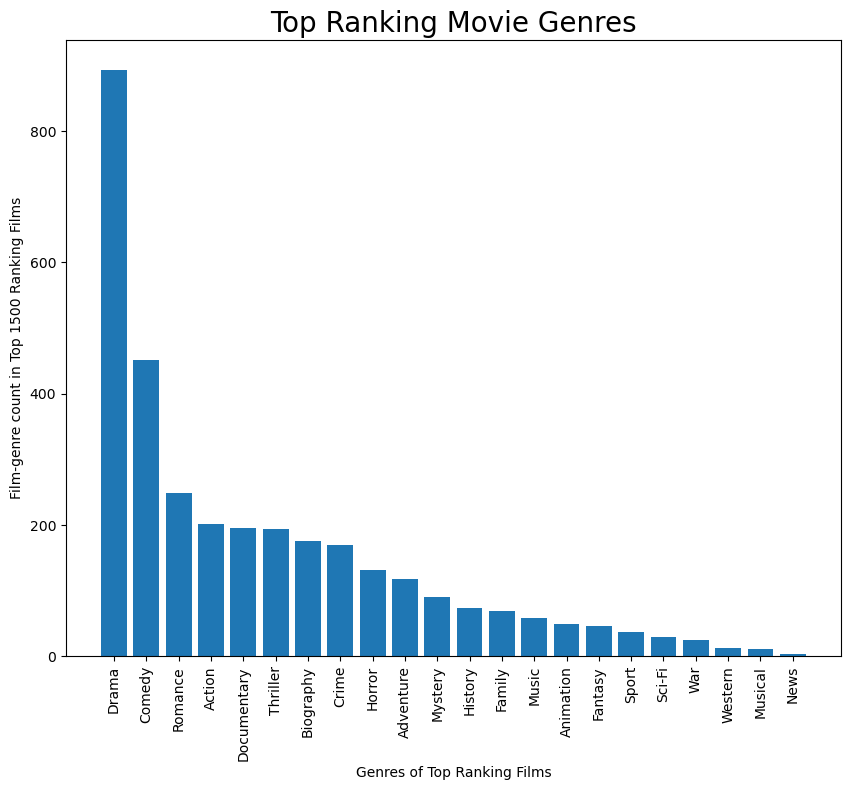

In [59]:
#Top Ranking Movie Genres
top_ranking_movie_genres = highest_rated_domestic.head(1500)
genre_count_ranks = highest_rated_domestic[['genre_1','genre_2','genre_3']].stack().value_counts()
x = genre_count_ranks.index
y = genre_count_ranks.values
plt.figure(figsize=(10,8), facecolor='white', edgecolor='black')
plt.bar(x,y)
plt.title("Top Ranking Movie Genres", fontsize =20)
plt.xticks(rotation=90)
plt.xlabel('Genres of Top Ranking Films')
plt.ylabel('Film-genre count in Top 1500 Ranking Films');

## **RUNTIME**

If Microsoft decides to open a movie studio and is trying to gauge the ideal movie length, it might be wise to start with a standard runtime (100 minutes) to play it safe. 

I achieved this by targeting runtimes for each genre and then finding the average runtime required. 

Using a bar plot to analyze the relationship between genre and runtime in minutes offers a clear visual presentation of data, allowing for each comparison between different genres. 
- Most of the genres like horror, thriller, drama, and adventure ranged from 90-100 minutes, however, the action, romance, sport, and biography ranged from 101-116 minutes. There were a few genres like family, sci-fi, and documentaries ranging from 29-87 minutes. 
- However, when we look at the average runtime for these genres, it suggests that a movie should run for at least 100 minutes. 

In [60]:
#topgenres in genre_1 column from ("highest_rated_domestic")
movie_genre_1 = highest_rated_domestic.groupby('genre_1', as_index=False).median(numeric_only=True).sort_values('runtime_minutes', ascending=True)
movie_genre_1.loc[:,['genre_1','runtime_minutes']].head(1500)


,genre_1,runtime_minutes
8,Family,29.5
14,Sci-Fi,60.0
6,Documentary,87.0
10,Horror,90.0
16,Thriller,91.0
11,Music,93.0
2,Animation,94.0
1,Adventure,95.0
9,Fantasy,99.0
7,Drama,101.0


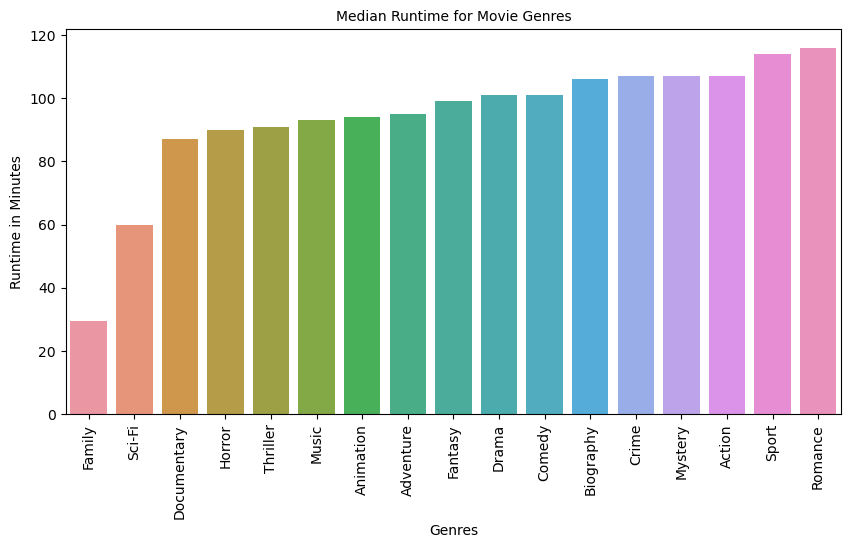

In [61]:
#runtime in minutes per genres
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x='genre_1', y='runtime_minutes', data=movie_genre_1.head(1500))

plt.xlabel("Genres")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime for Movie Genres", size=10)
plt.xticks(rotation=90)

plt.show()

In [62]:
#finding out mean for 'runtime_minutes' which is important to find out how much average time in minute should a movie run for? 
highest_rated_domestic['runtime_minutes'].mean()

100.876

## **CORRELATION BETWEEN DOMESTIC GROSS -----> RUNTIME, GENRES, PRODUCTION BUDGET**

- First thing to consider was the statistic for domestic_gross, this was acheived by using Box plot visualization. A boxplot shows the median, quartiles, and possible outliers of a dataset (for this i excluded the outliers to get clear output). It gives a visual summary of the central tendancy, spread, and shape of the distribution of the data. 
- Looking at the box plot below, we can see that the centre line which represent median IQR (50th percentile) shows that the half of movies have grossed below 7,77,500.0 dollars and half have grossed more. The average domestic gross was 12,216,340.00 dollars.

In [63]:
#Descriptive statistic of column 'domestic_gross' from DataFrame : highest_rated_domestic
print(highest_rated_domestic[['domestic_gross']].describe())

       domestic_gross
count    1.500000e+03
mean     1.221634e+07
std      3.266563e+07
min      1.000000e+02
25%      9.900000e+04
50%      7.775000e+05
75%      7.050000e+06
max      4.126000e+08


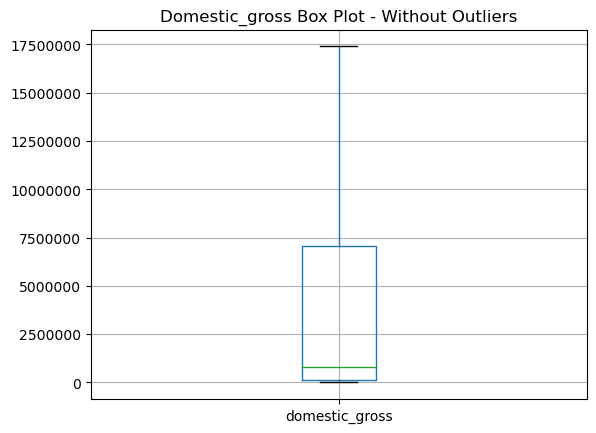

In [64]:
#creating a boxplot using 'boxplot' method of the DataFrame
#for domestic_gross from highest_rated_domestic DataFrame
highest_rated_domestic.boxplot(column='domestic_gross', showfliers=False)
plt.ticklabel_format(style='plain',axis='y')
plt.title("Domestic_gross Box Plot - Without Outliers")
plt.show()

## **Correlation between domestic_gross and runtime in minutes profit?**

To check the correlation between domestic gross and runtime I preferred using a scatter plot. A scatter plot is the best fit for representing the correlation between two quantitative values.

- The scatter plot between the domestic gross in millions and the runtime (length in minutes) of movies shows a weak correlation, it means that there isn't a strong linear relationship between these two variables (horizontal line of best fit = weaker correlation). 
- There isn't a universally "perfect" length of a movie. some shorter films (e.g. under 90 minutes) can be incredibly successful while some longer films (e.g. over 120 minutes) can be hit too. Conversely, movies by length can also be box office flops. 
- Therefore some points to consider from here is that if runtime is not the best factor for figuring out the success of a movie then what are other factors to consider for a movie's financial success?  Is the quality of the storyline, is it the genre, the actors involved, the direction, marketing, time of the year?


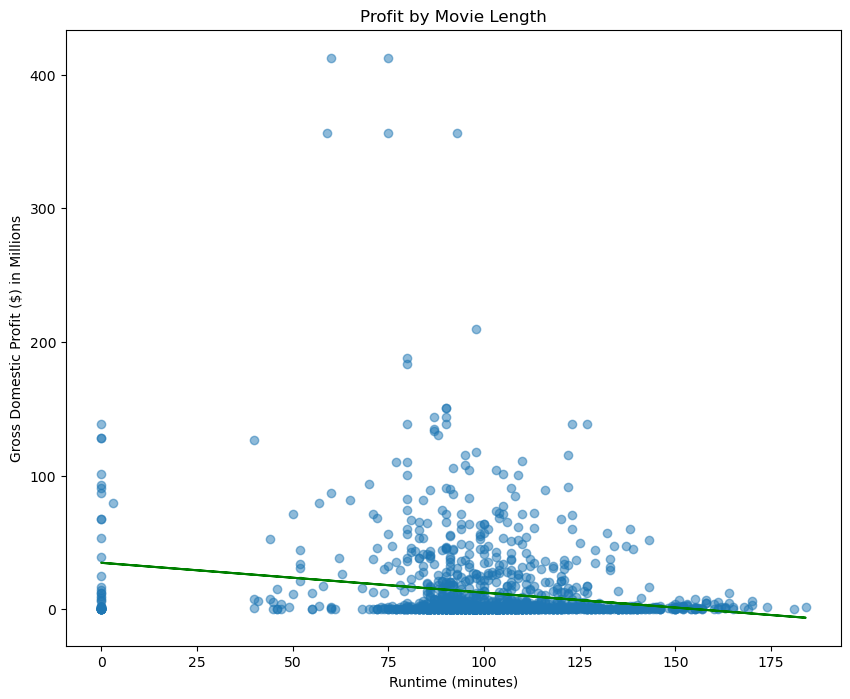

In [65]:
#correlation between runtime and domestic_gross profit? Weak correlation here. 
x = highest_rated_domestic['runtime_minutes']
y = (highest_rated_domestic.domestic_gross)/ 1000000
fig,ax = plt.subplots(figsize=(10,8), facecolor = 'white', edgecolor= 'black')
ax.scatter(x,y, alpha = .5)

ax.set_title("Profit by Movie Length")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Gross Domestic Profit ($) in Millions")

#this calculates the slope 'm' and y-intercept 'b' of the line of best fit for the given x and y data. '1' indicates line.
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x +b, color = "green", label="line of best fit")
ax.ticklabel_format(axis = 'y', style='plain');

In [66]:
#Create a new column in your dataframe with values in millions.
highest_rated_domestic['domestic_gross_millions'] = highest_rated_domestic['domestic_gross']/1000000
highest_rated_domestic

,tconst,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genre_1,genre_2,genre_3,domestic_gross_millions
910,tt1578261,Break Ke Baad,118.0,"Comedy,Drama,Romance",5.2,3651.0,Relbig.,428000,389000,2010,Comedy,Drama,Romance,0.4280
224,tt1028576,Secretariat,123.0,"Biography,Drama,Family",7.2,24536.0,BV,59700000,537000,2010,Biography,Drama,Family,59.7000
1845,tt2387589,The Girl on the Train,80.0,Thriller,4.4,819.0,Strand,208000,97100,2010,Thriller,None,None,0.2080
590,tt1373156,Karthik Calling Karthik,135.0,"Drama,Mystery,Thriller",7.0,9257.0,Eros,286000,7100,2010,Drama,Mystery,Thriller,0.2860
525,tt1308165,The Taqwacores,83.0,"Drama,Music",6.1,506.0,Strand,11400,NaN,2010,Drama,Music,None,0.0114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,tt6588966,Hichki,116.0,"Comedy,Drama",7.5,7418.0,Yash,330000,3900000,2018,Comedy,Drama,None,0.3300
2116,tt3041550,Matangi/Maya/M.I.A.,96.0,"Biography,Documentary,Music",7.5,1116.0,Abr.,231000,NaN,2018,Biography,Documentary,Music,0.2310
2171,tt3289724,Welcome to Marwen,116.0,"Biography,Comedy,Drama",6.1,8920.0,Uni.,10800000,2100000,2018,Biography,Comedy,Drama,10.8000
2711,tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683.0,Annapurna,1500000,4000000,2018,Action,Crime,Drama,1.5000


### **Correlation between domestic gross and movie genres ?**
- I used a horizontal bar plot to analyze the correlation between domestic gross and movie genres which involved displaying the average domestic gross for each genre. 

This plot gave insight into what genres are currently more popular or preferred by the domestic audience. 

- The bar plot showed that the Drama and Comedy genres generated the highest box office revenue of 3.0 to 3.5 million in the given domestic market. 
- Genres like adventure, documentary, crime, action, horror, and biography showed 0.1 to 2.5 million hits at the box office.  
- While Sci-fi, family, fantasy, animation and thriller were among the lowest generated box office revenue
- Also some genres like romance, mystery, music and sport shows no box office revenue



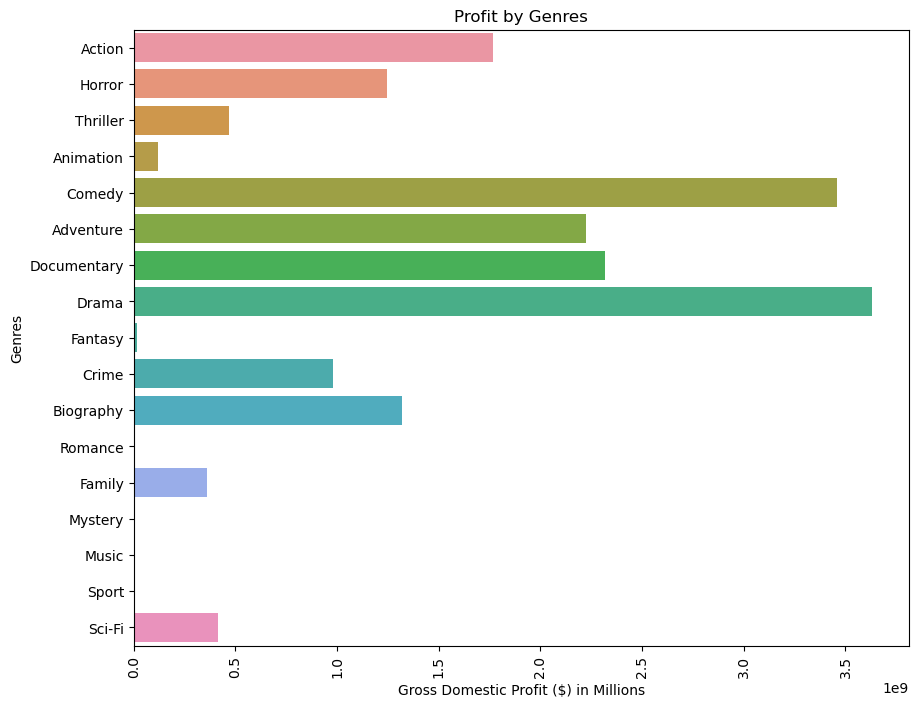

In [67]:
#sort the data by 'domestic_gross' in descending order

highest_rated_domestic = highest_rated_domestic.sort_values(by='domestic_gross', ascending=True)

#creating barplot using the 'seaborn' libary as ('sns') to visualize the profit made by different movie genres. 
x= (highest_rated_domestic.domestic_gross)/1000000
y= highest_rated_domestic['genre_1']
fig, ax = plt.subplots(figsize=(10,8), facecolor = 'white', edgecolor= 'black')

sns.barplot(x='domestic_gross', y= 'genre_1', data=highest_rated_domestic,estimator=sum,errorbar=None)


ax.set_title("Profit by Genres")
ax.set_xlabel("Gross Domestic Profit ($) in Millions")
ax.set_ylabel("Genres")
plt.xticks(rotation=90)
plt.show()


## **Correlation between Production budget and Domestic gross?**

Does this mean the more money that is put into making a movie, the more money that movie will make? 

- Using a scatter plot we can see from the figure below, that there are a lot of dot points in the lower left portion of the graph and fewer movies in the top right portion of the graph. Higher budget movies appear to have higher revenue but how much higher and stronger is that relationship, is something to consider. This can be achieved by calculating the linear regression analysis.
- The slope of the line is positive and steep indicating a strong positive correlation between production budget and domestic gross. 

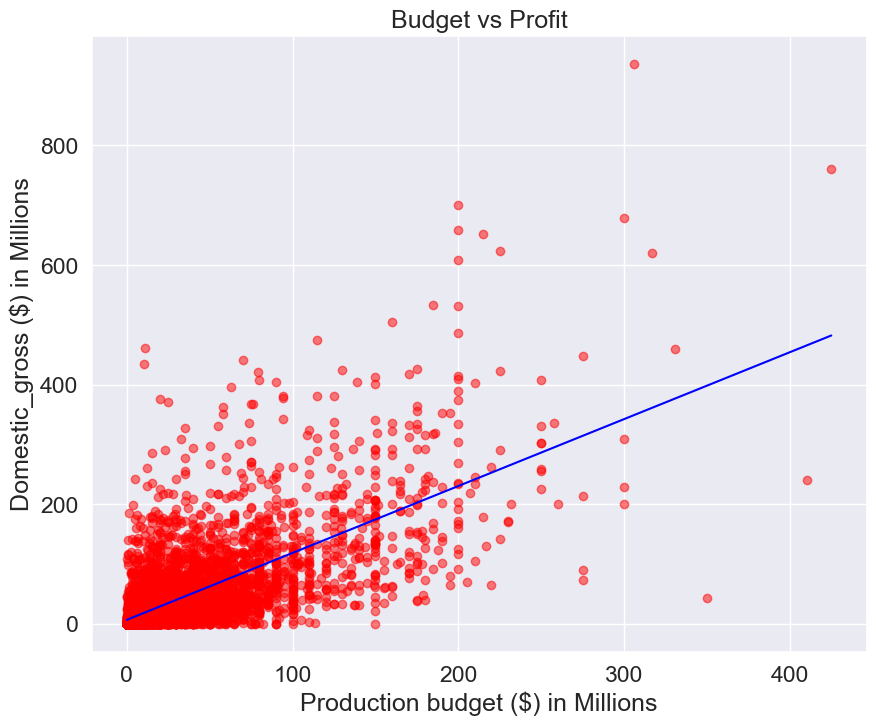

In [68]:
#correlation between production budget and domestic_gross
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

x = df4['production_budget']/1000000
y = df4['domestic_gross']/1000000

#this calculates the slope 'm' and y-intercept 'b' of the line of best fit for the given x and y data. '1' indicates straight line.
m, b = np.polyfit(x,y,1)

fig,ax = plt.subplots(figsize=(10,8), facecolor = 'white', edgecolor= 'black')
ax.scatter(x,y, color = 'red', alpha = .5)

plt.plot(x, m*x +b, color = "blue", label="line of best fit")
ax.set_title("Budget vs Profit")
ax.set_xlabel("Production budget ($) in Millions")
ax.set_ylabel("Domestic_gross ($) in Millions")


ax.ticklabel_format(axis = 'y', style='plain');

 # <font color='red' > Evaluation </font>

The analysis offers a comprehensive view of movie preferences by genre, average runtime, and box office revenue. Below is a concise evaluation of my findings: 

**GENRE PREFERENCE** 
- Drama takes the lead in terms of popularity, suggesting audiences appreciate in-depth storylines and emotions that they can resonate with.
- Comedies are the second most preferred, emphasizing the value of entertainment and laughter.
- Romance and Action films come next, suggesting audiences are diversified in their taste, seeking both emotional connection and adrenaline-pumping sequences.
- Some audiences also like Documentaries which indicates an interest in real-life narratives and educational content. 

**MOVIE RUNTIME**
- A majority of movie genres span between 90-116 minutes. Despite the range, the average runtime for most films is around 100 minutes.

**DOMESTIC GROSS**
- There is a weak correlation between runtime and domestic gross which signifies that the length of a movie doesn't necessarily predict its financial success. 
- Drama and Comedy movies unsurprisingly given their popularity, lead in terms of revenue. Interestingly, despite action films being fourth in terms of preferences, they aren't among the top-grossing genres. This might be due to production cost or market saturation. Genres like romance, mystery, music and sport not generating any revenue are surprising and may warrant further investigation. This could be due to fewer films being produced in these genres or issues with data collection.
- A positive correlation between a movie's budget and its revenue suggests that investment in production tends to lead to higher returns. 

 # <font color='red' > Conclusions </font>

In examining the movie industry from 2010 to 2018, it's evident that genre plays a pivotal role in a film's success with Drama and Comedy leading in audience preferences and revenue generation. While the average runtime of the film gravitates around 1 hour 40 minutes, the length isn't a direct predictor of financial success. Instead the correlation between movie's production budget and its gross indicates that investment in production often results in better returns. 

**Business Recommendation to Microsoft Company**

- **Diversify Portfolio**: While Drama and Comedy have shown strong results, it's important to maintain a diversified portfolio of movie genres to cater to varied audiences preferences and mitigate risks.
- **Budget Allocation**: Allocate budget wisely, focusing on key areas like story quality, casting and post production. A higher budget often correlates with higher returns, but its crucial to ensure the budget is used effectively. 
- **Market Research**: Conduct more in-depth market research to understand why genres such as romance, mystery, music aren't generating revenue. This will help in making informed decisions for future projects. 
- **Movie marketing**: With a movie runtime not being a direct predictor of success in terms of revenue, marketing strategies can play a pivotal role in the movie success. 

Some of the reason to consider for analysis might not fully solve the bussiness problems: 

- The data only span from 2010 to 2018, which might not capture the most recent trends.
- Factors like quality of storyline, directorial talent, and cast performances which might not be quantified easily but it plays a huge role in movie's success
- The role of marketing, production, and release strategies is not captured in these datasets but can significantly impact a movie's success

Future improvements for these datasets

- Regularly updating data can give a comprehensive view of current trends. 
- Incorporate additional data like critical reviews, audience feedback and competition between movies release in same year to give a holistic view of the factors influencing movie success. 


In conclusion while the analysis provides valuable insights, the movie industry's complexity requires a multifaceted approach, considering both quantifiable metrics and qualitative factors to run a successful movie studio. 

